In [ ]:
# Importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style for better visualizations
sns.set(style="whitegrid")


In [ ]:
# Importing necessary libraries
import pandas as pd
from google.colab import files

# Upload the dataset file
uploaded = files.upload()

# Read the uploaded dataset, specifying an encoding that handles non-UTF-8 files
df = pd.read_csv(list(uploaded.keys())[0], encoding='ISO-8859-1')  # You can change the encoding if necessary

# Display the first few rows of the dataset
df.head()


Saving Sample - Superstore.csv to Sample - Superstore (1).csv


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [ ]:
# Convert the 'Order Date' column to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Extract year, month, and day for further analysis
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month
df['Day'] = df['Order Date'].dt.day

# Show dataset with new date columns
df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Year,Month,Day
0,1,CA-2016-152156,2016-11-08,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,2016,11,8
1,2,CA-2016-152156,2016-11-08,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2016,11,8
2,3,CA-2016-138688,2016-06-12,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,2016,6,12
3,4,US-2015-108966,2015-10-11,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2015,10,11
4,5,US-2015-108966,2015-10-11,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,2015,10,11


In [ ]:
# Check for missing values
print(df.isnull().sum())

# Handle missing values (if necessary)
# You can fill missing values, drop rows, or impute values depending on your data
df = df.dropna()

# Handle outliers (optional, depends on data)
# Example: removing extreme outliers in sales and profit using quantiles
Q1 = df['Sales'].quantile(0.25)
Q3 = df['Sales'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['Sales'] >= lower_bound) & (df['Sales'] <= upper_bound)]


Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
Year             0
Month            0
Day              0
dtype: int64


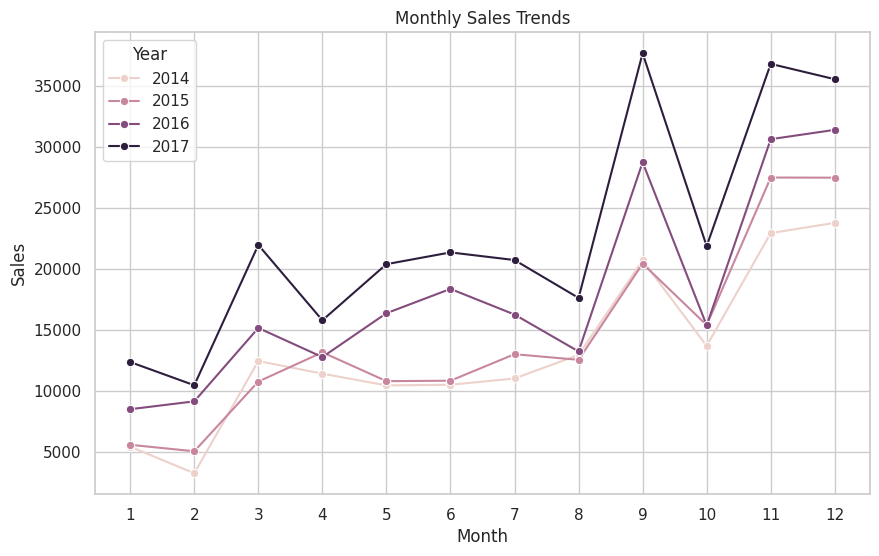

In [ ]:
# Group by year and month to get monthly sales
monthly_sales = df.groupby(['Year', 'Month'])['Sales'].sum().reset_index()

# Plot monthly sales trends
plt.figure(figsize=(10,6))
sns.lineplot(x='Month', y='Sales', hue='Year', data=monthly_sales, marker="o")
plt.title('Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.xticks(range(1,13))
plt.show()


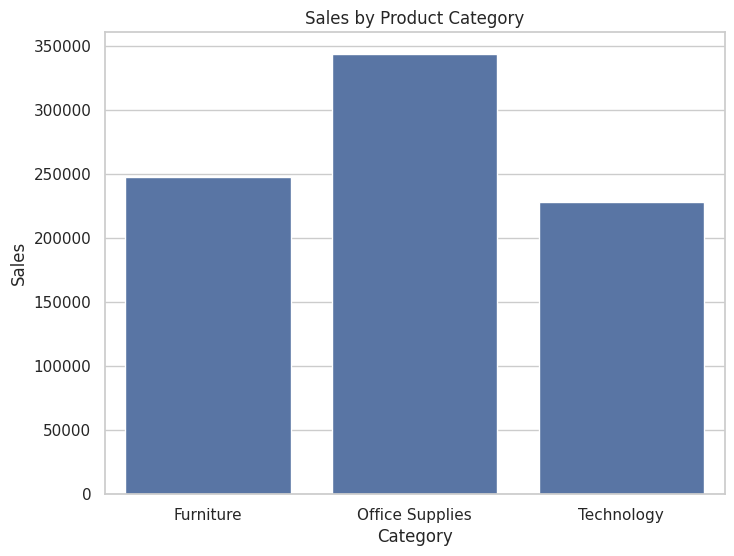

In [ ]:
# Group by Category to analyze the total sales by category
category_sales = df.groupby('Category')['Sales'].sum().reset_index()

# Plot sales by category
plt.figure(figsize=(8,6))
sns.barplot(x='Category', y='Sales', data=category_sales)
plt.title('Sales by Product Category')
plt.ylabel('Sales')
plt.show()


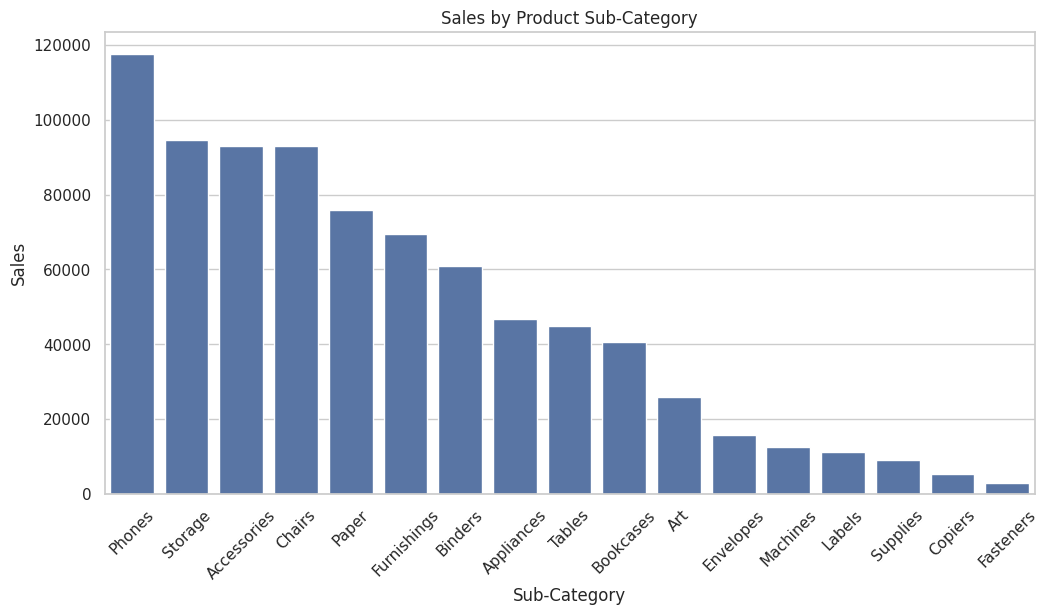

In [ ]:
# Group by Sub-Category to analyze total sales
subcategory_sales = df.groupby('Sub-Category')['Sales'].sum().reset_index()

# Sort for better visualization
subcategory_sales = subcategory_sales.sort_values(by='Sales', ascending=False)

# Plot sales by sub-category
plt.figure(figsize=(12,6))
sns.barplot(x='Sub-Category', y='Sales', data=subcategory_sales)
plt.title('Sales by Product Sub-Category')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.show()


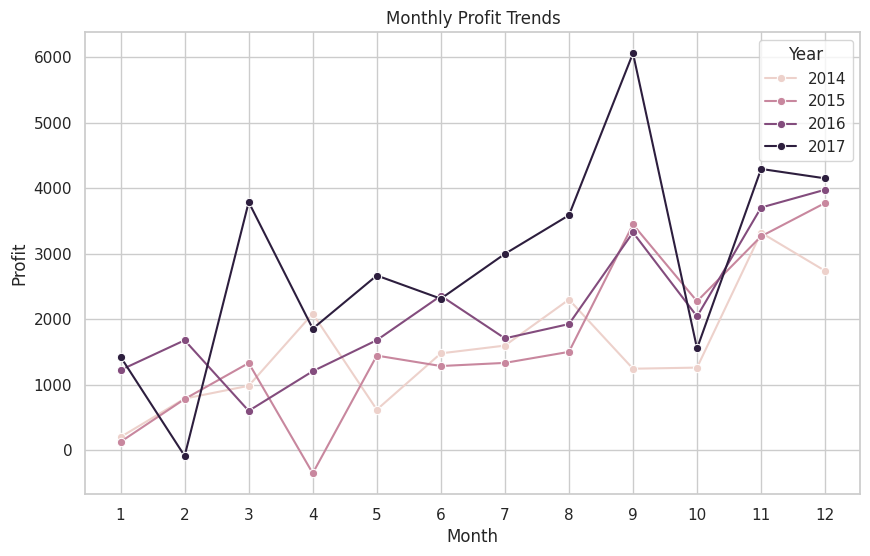

In [ ]:
# Group by year and month to get monthly profit
monthly_profit = df.groupby(['Year', 'Month'])['Profit'].sum().reset_index()

# Plot monthly profit trends
plt.figure(figsize=(10,6))
sns.lineplot(x='Month', y='Profit', hue='Year', data=monthly_profit, marker="o")
plt.title('Monthly Profit Trends')
plt.xlabel('Month')
plt.ylabel('Profit')
plt.xticks(range(1,13))
plt.show()


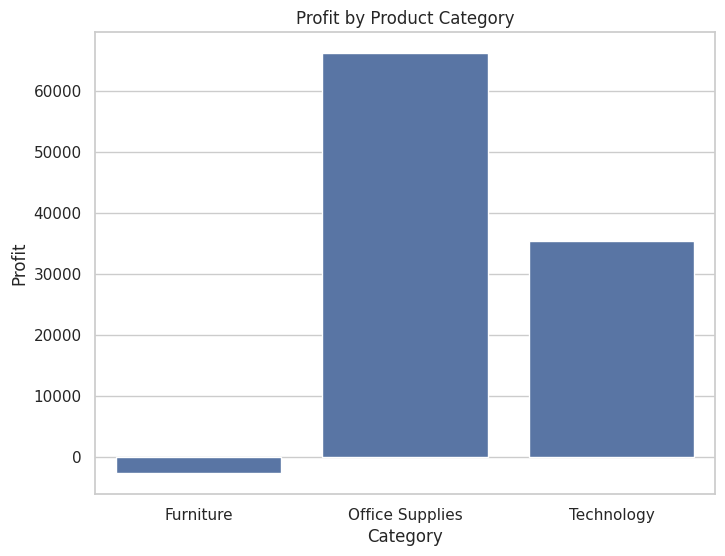

In [ ]:
# Group by Category to analyze total profit by category
category_profit = df.groupby('Category')['Profit'].sum().reset_index()

# Plot profit by category
plt.figure(figsize=(8,6))
sns.barplot(x='Category', y='Profit', data=category_profit)
plt.title('Profit by Product Category')
plt.ylabel('Profit')
plt.show()

